In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_32232\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[2836]

Unnamed: 0                         2836.000000
EPIC ID                       211537990.000000
Teff                               4078.268000
logg                                  4.802200
Flare #                              17.000000
Observation time                     74.800673
Average flare duration                0.141820
Longest flare duration                0.306474
Shortest flare duration               0.081727
Average percentage increase          17.909645
Highest percentage increase         182.621527
Lowest percentage increase            5.467045
Name: 2836, dtype: float64

In [4]:
flc = from_mast("211537990", mode="LC", mission="K2")

6% (211/3657) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
6% (211/3657) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

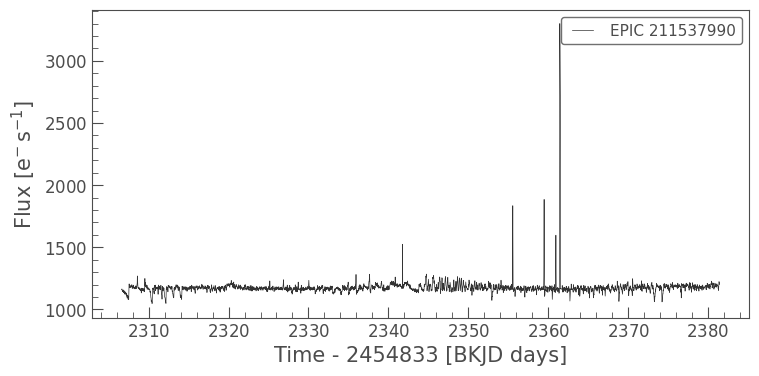

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

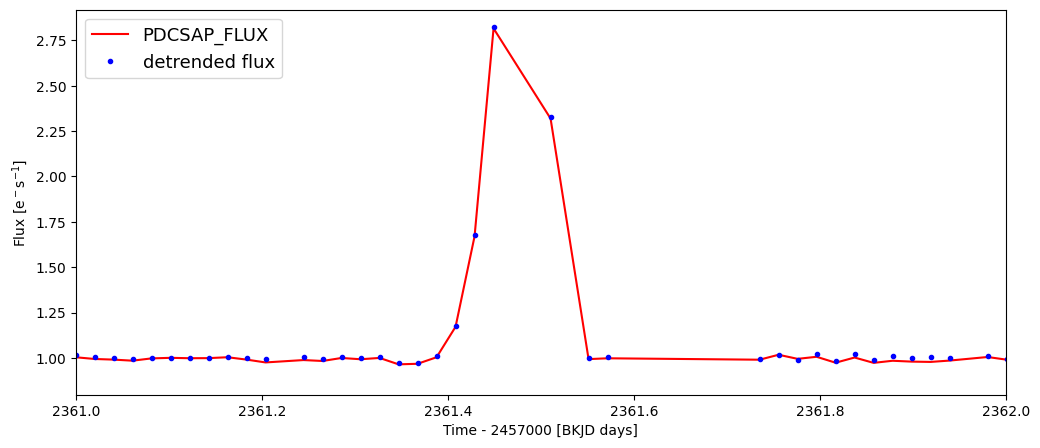

In [10]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
plt.xlim(2361, 2362)
#plt.ylim(.95,1.05)
plt.legend(loc=2,fontsize=13);

In [9]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,92,96,107647,107651,2308.551358,2308.633086,342.61123649654803,20.876391555040886,0.08241546154022217,0.081728,3430.000000
1,1364,1368,108985,108990,2335.889082,2335.991240,576.6706638772536,29.115459197201602,0.10468018054962158,0.102158,3430.000000
2,1443,1449,109066,109074,2337.544046,2337.707499,902.3418763879743,40.109166029640924,0.09264016151428223,0.163453,3430.000000
3,1779,1787,109413,109422,2344.633826,2344.817710,1015.7203874724289,36.71973641186509,0.08469033241271973,0.183885,3430.000000
4,1819,1833,109455,109470,2345.491954,2345.798429,1690.3393745426206,42.301885812872634,0.10014653205871582,0.306474,3430.000000
5,1859,1866,109498,109506,2346.370515,2346.533968,623.6889996364666,32.76794577489495,0.06209540367126465,0.163453,3430.000000
6,1873,1877,109513,109518,2346.676989,2346.779148,434.2172643342632,29.181398601226054,0.0567554235458374,0.102158,3430.000000
7,1890,1899,109531,109540,2347.044759,2347.228644,926.0910789661912,33.20498916972265,0.09075021743774414,0.183885,3430.000000
8,1904,1911,109546,109554,2347.351234,2347.514687,731.544277252515,32.400866969611776,0.0852358341217041,0.163453,3430.000000
9,1919,1924,109562,109568,2347.678140,2347.800730,467.4378380947086,32.90559885361977,0.060680270195007324,0.122590,3430.000000


In [8]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 17 candidate(s) in the (0,2534) gap.
Found 0 candidate(s) in the (2534,3430) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
